create : @tarickali 23/31/05 \
update : @tarickali 23/31/05 \
source : https://www.tensorflow.org/tutorials/quickstart/beginner

# Basic Classification: Classify Images of Clothing

We will train a neural network to classify images of clothing using `tf.keras`

In [1]:
# Import TensorFlow
import tensorflow as tf

# Import helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Check version of TensorFlow
tf.__version__

'2.12.0'

## Load data

We will be using the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. Each image is a low resolution article of clothing (28x28 pixels).

Fashion MNIST is similar to MNIST, but slightly more challenging, and can act as a drop-in replacement when testing and verifiying that your architecutures and algorithms are working as expected. As such, they both act as good starting points to debug your code.

In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Shape of dataset: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Min and max pixel values of images: 0 255


Each image is 28x28 array with min value 0 and max value 255. The labels are arrays of integers ranging from 0 to 9 which correspond to a the class of clothing. We will create a list that stores the name of each class that is mapped by labels.

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

We will quickly explore the data by looking at the shape of the train and test images as well as the content of the label arrays.

In [10]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

Notice that the shapes and contents match our claims from the previous section.

## Preprocess the data

To train a neural network model on our data it must first be preprocessed.
If we inspect the first image of our training set we will see that the pixel values are between [0, 255] (as previously noted).

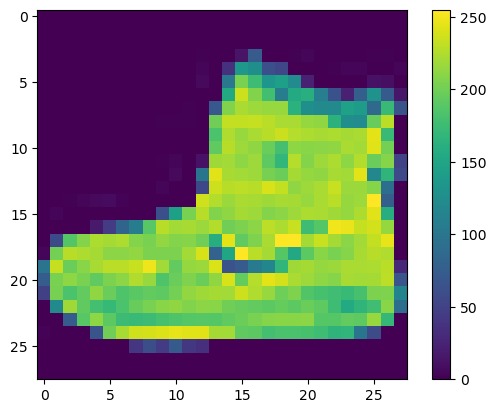

In [15]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We will scale all images to be between 0 and 1 before passing them into the neural network.

In [16]:
train_images, test_images = train_images / 255., test_images / 255.

Let's display the first 25 images of our data to check that everything is in order before training our model.

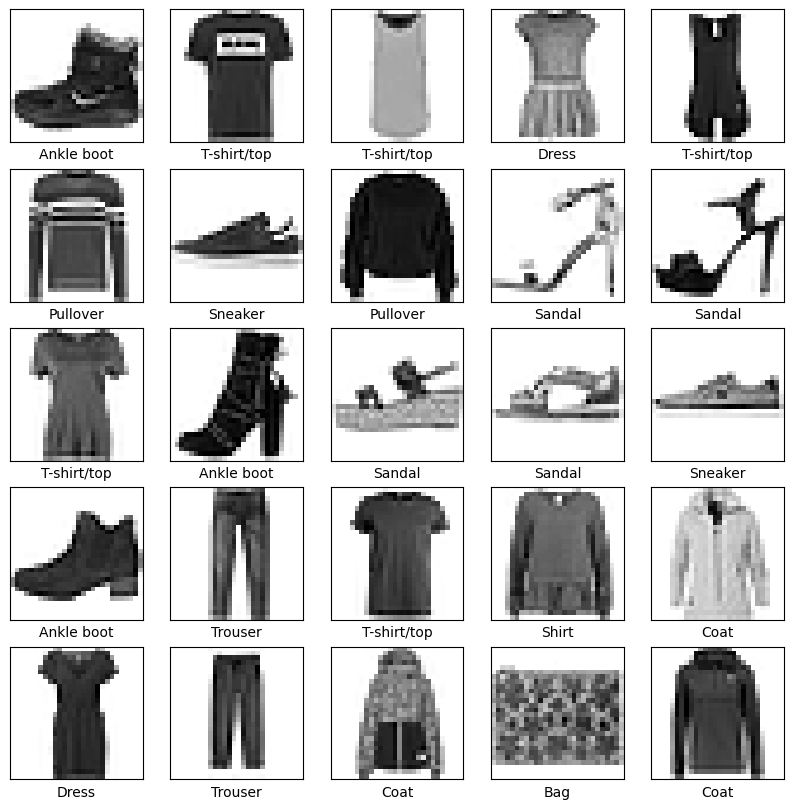

In [21]:
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

To build a model we need to configure the structure (layers) of the neural network and then compile the model.

### Set up the layers

The basic building block of neural networks is a `layer`.
A neural network, at least a `Sequential` model, is made up of multiple layers stacked ontop of each other.
Each layer is meant to extract meaningful representations of the data which is passed to the later layer to continue extracting patterns.

Most of deep learning consists of chaining togther simple layers.
Some of these layers also have parameters that are learned during training, such as `tf.keras.layers.Dense`

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transform (28, 28) 2D array -> (1, 784) 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) # return logits
])

### Compile the model

We will use the `Adam` optimizer, `SparseCategoricalCrossentropy` loss, and `accuracy` metric to compile our model.

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Train the model

To train a neural network model we have the following steps:
- Feed the training data `(train_images, train_labels)`
- The model learns patterns between input and output
- Make predictions with the model on the test data `test_images`
- Evaluate predictions with `test_labels`

### Feed the model

To feed data to the model and have it train we use the `model.fit` method.

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2023-05-31 12:11:41.542759: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 9s 5ms/step - loss: 0.5531 - accuracy: 0.8091
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4743 - accuracy: 0.8369
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4679 - accuracy: 0.8400
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4740 - accuracy: 0.8389
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4682 - accuracy: 0.8409
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4688 - accuracy: 0.8409
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4816 - accuracy: 0.8385
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4881 - accuracy: 0.8381
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4954 - accuracy: 0.8383
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4994 - accur

### Evaluate accuracy

To evaluate the performance of our model on the test data we use the `model.evaluate` method.

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_acc

313/313 - 1s - loss: 0.5229 - accuracy: 0.8331 - 1s/epoch - 4ms/step


0.8331000208854675

The accuracy of the model on the test data (~83%) is slightly worse than the accuracy on the train data (~84%).
The gap between train accuracy and test accuracy is known as *overfitting* which is a result of the model "memorizing" the training data (with its noise) instead of learning general patterns.
In this case, we would not consider the model to be overfitting since the gap is only 1% and a slight reduction in accuracy between train and test data is inherent in any model.

### Make Predictions

We can now use the trained model to make predictions about some images.
To do this, we will attach a `Softmax` layer to convert the outputs of the model from logits to probabilites.

In [28]:
prob_model = tf.keras.models.Sequential([model, tf.keras.layers.Softmax()])

In [29]:
preds = prob_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


Now `preds` holds the probability of each label for each image in the test data.
We can check what is the predicted class of an image by checking the maximize index of that image.

In [44]:
print('Prediction probabiliites of image 0:', preds[0])
print('Predicted label for image 0:', np.argmax(preds[0]))
print('True label of image 0:', test_labels[0])
print('Accuracy between predictions and true labels:', (np.argmax(preds, axis=1) == test_labels).sum() / len(test_labels))

Prediction probabiliites of image 0: [1.0413582e-08 7.3617743e-15 8.0618712e-09 1.4683810e-08 8.5240771e-08
 3.5464849e-02 4.4875091e-07 5.8727503e-02 1.4289399e-04 9.0566415e-01]
Predicted label for image 0: 9
True label of image 0: 9
Accuracy between predictions and true labels: 0.8331


### Verify Predictions

Finally, let's plot the test imgaes and their predicted probabilities.

In [45]:
def plot_image(img, true_label, preds):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    pred_label = np.argmax(preds)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'{class_names[pred_label]} {100*np.max(preds):2.0f} ({class_names[true_label]})', color=color)

def plot_values(true_label, preds):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plot = plt.bar(range(10), preds, color='blue')
    plt.ylim([0, 1])
    pred_label = np.argmax(preds)

    plot[pred_label].set_color('red')
    plot[true_label].set_color('blue')


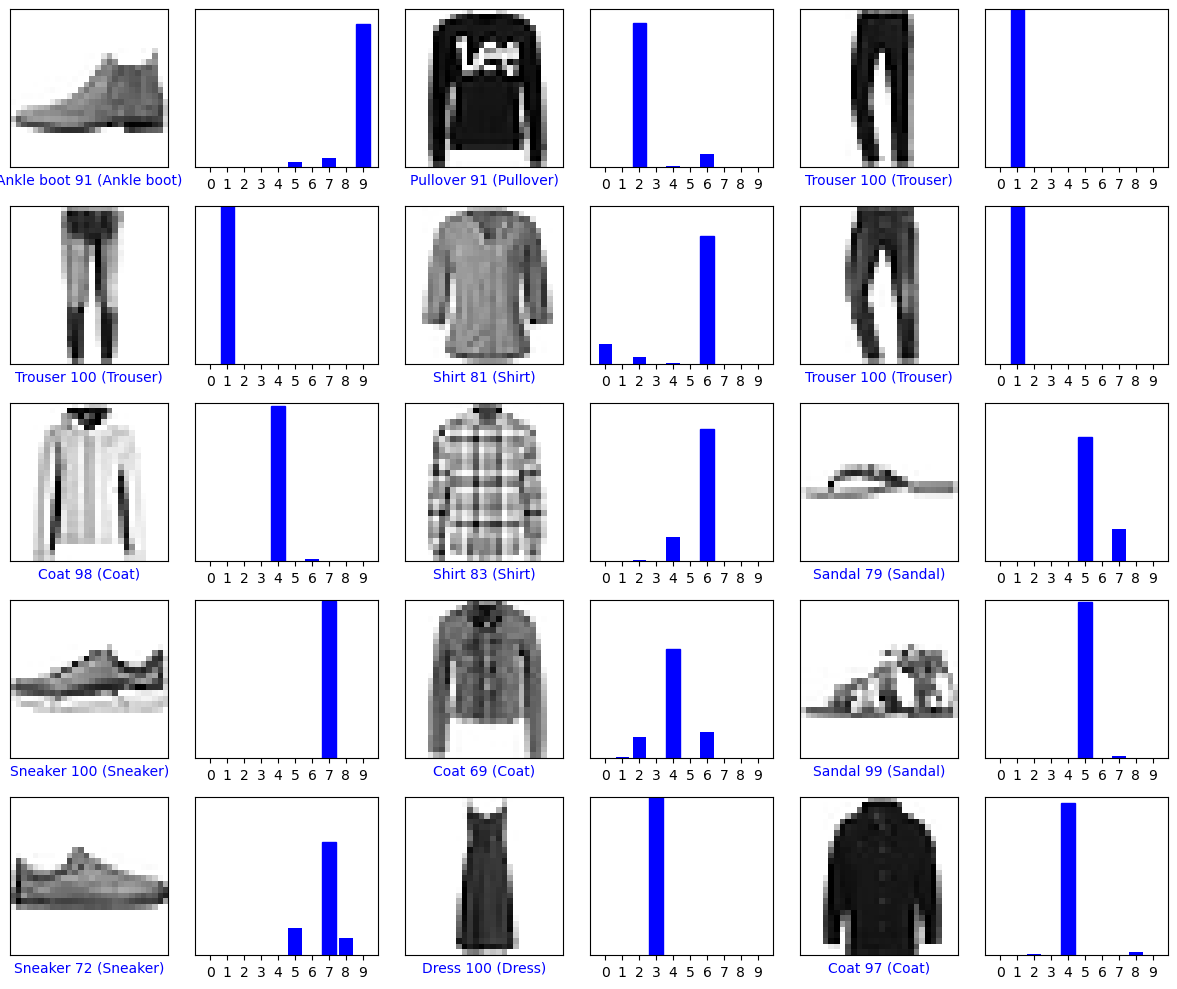

In [46]:
rows, cols = 5, 3
num_imgs = rows * cols
plt.figure(figsize=(2 * 2 * cols, 2 * rows))
for i in range(num_imgs):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plot_image(test_images[i], test_labels[i], preds[i])
    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plot_values(test_labels[i], preds[i])
plt.tight_layout()
plt.show()

## Use the train model

We can now finally used the trained model to make a prediction about a single image.

In [80]:
k = 2
img = test_images[k]
img.shape

(28, 28)

`tf.keras` models are optimized to make predictions on batched, so we will need to reshape our single example to be a batch of size 1.

In [81]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 28, 28)

In [82]:
single_pred = prob_model(img)
single_pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[8.2975529e-09, 9.9965668e-01, 1.7469957e-18, 5.6451976e-15,
        1.2868752e-17, 3.4319138e-04, 7.7031643e-14, 1.3906472e-07,
        3.8017855e-13, 1.9775529e-12]], dtype=float32)>

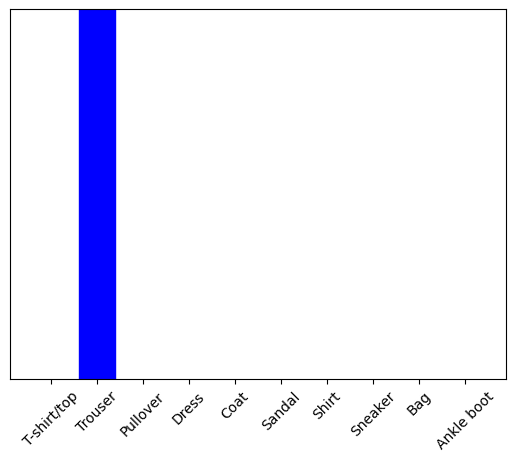

In [87]:
plot_values(test_labels[k], single_pred[0])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [88]:
np.argmax(single_pred[0])

1

In [89]:
test_labels[k]

1

The predicted class the `k=2` images correctly matches the true class!